<a href="https://colab.research.google.com/github/riddhi-jain/The-Sparks-Foundation-Internship-Tasks/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Using Decision Tree Algorithm
## by- Riddhi Jain


* This notebook includes creating a Decison Tree Classifier and visualizing it using a graph.

* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

* 
Following code includes step by step creation of the model.



# 1.Data Preprocessing

In [ ]:
# importing python libraries 
import numpy as np
import pandas as pd

import sklearn

# importing modules from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# importing dataset
iris_data = datasets.load_iris()

# forming a dataframe for given dataset
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [ ]:
# printing the dataframe
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# extracting dependent and independent variable
x = iris.values[:, 0:4]
y = iris_data.target

In [ ]:
# splitting dataset into test and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

# 2.Fitting a Decision-Tree algorithm to the Training set

In [ ]:
# importing the classification algorithm from sklearn library
from sklearn.tree import DecisionTreeClassifier

# create a classifier of decision tree type
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# fitting the algorithm to training set
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# 3.Predicting test result

In [ ]:
y_pred = classifier.predict(x_test)

# 4.Testing accuracy of result

In [ ]:
# importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

# creating a confusion matrix to check the accuracy of model
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# printing confusion_matrix
cm

array([[17,  0,  0],
       [ 0, 10,  4],
       [ 0,  0, 14]])

# 5.Checking the accuracy of model

In [ ]:
# import module
from sklearn.metrics import accuracy_score

# check accuracy
print('accuracy of the model =', (accuracy_score(y_test, y_pred))*100,'%')

accuracy of the model = 91.11111111111111 %


# 6.Visualize the Decison Tree

In [ ]:
# visualizing atext representation of the decision tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_0 <= 4.95
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 5.15
|   |   |   |--- feature_1 <= 3.05
|   |   |   |   |--- feature_3 <= 1.70
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.70
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.05
|   |   |   |   |--- feature_3 <= 1.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.90
|   |   |   |   |   |--- class: 2
|   |   |--- feature_2 >  5.15
|   |   |   |--- class: 2



In [ ]:
# installing libraries for visual representation of tree
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# import necessary libraries for graph viz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

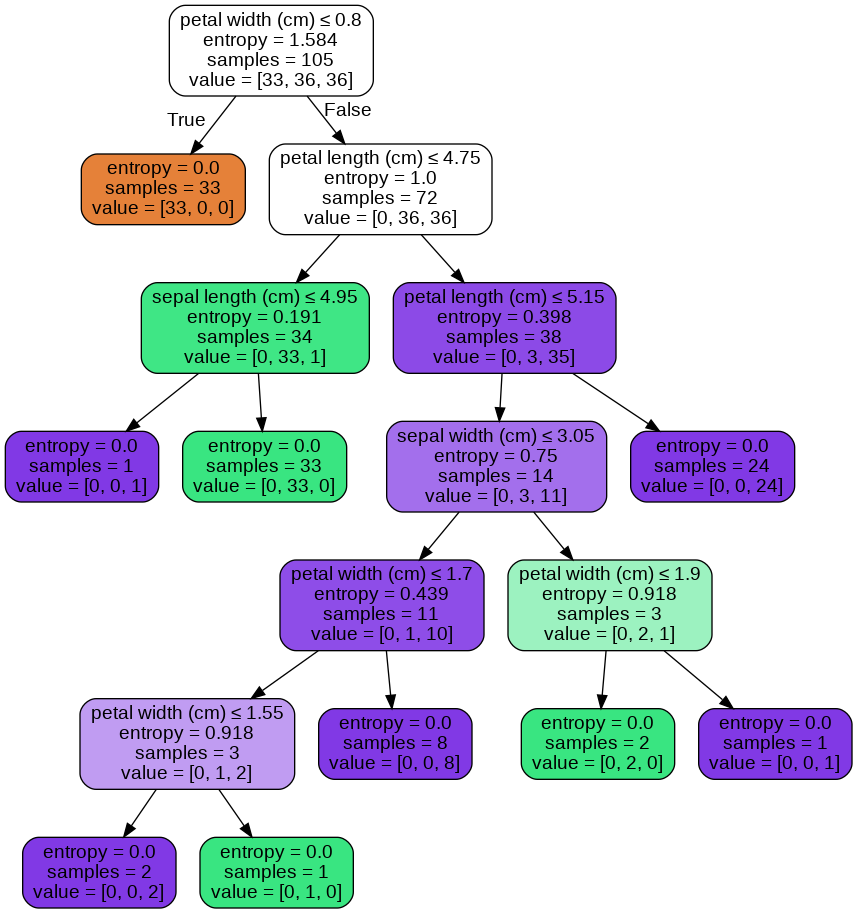

In [ ]:
# Visualize a graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                feature_names=iris_data.feature_names,
                filled= True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

image = Image(graph.create_png())
image

**The model is now ready to predict the right class according to any new/test data fed to this classifer.**